In [1]:
# testing to see if we can get some data here
from pybaseball import lahman
import pandas as pd
import numpy as np

In [2]:
pitching_df = lahman.pitching()
awards_df = pd.read_csv('../data/baseballdatabank-2022/contrib/AwardsPlayers.csv')
people_df = lahman.people()
all_star_df = lahman.all_star_full()

In [5]:
awards_df[awards_df.playerID == 'morrija02']

,playerID,awardID,yearID,lgID,tie,notes
3497,morrija02,TSN All-Star,1981,AL,NaN,RHP
3512,morrija02,TSN Pitcher of the Year,1981,AL,NaN,NaN
3682,morrija02,Babe Ruth Award,1984,AL,NaN,P
4246,morrija02,Babe Ruth Award,1991,AL,NaN,P
4323,morrija02,World Series MVP,1991,ML,NaN,NaN


In [3]:
awards_df.awardID.unique()
# Pitching Triple Crown
# TSN Pitcher of the Year
# Rookie of the Year
# Cy Young Award
# Gold Glove
# TSN Fireman of the Year
# Rolaids Relief Man Award
# TSN Reliever of the Year
# Reliever of the Year Award

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award',
       'Rolaids Relief Man Award', 'NLCS MVP', 'ALCS MVP',
       'Silver Slugger', 'Branch Rickey Award', 'Hank Aaron Award',
       'TSN Reliever of the Year', 'Comeback Player of the Year',
       'Outstanding DH Award', 'Reliever of the Year Award',
       'SIlver Slugger'], dtype=object)

In [7]:
people_df[(people_df.nameFirst == "Felix")&(people_df.nameLast == 'Hernandez')]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
8094,hernafe02,1986.0,4.0,8.0,Venezuela,Carabobo,Valencia,NaN,NaN,NaN,...,Hernandez,Felix Abraham Graham,220.0,75.0,R,R,2005-08-04,2019-09-26,hernf002,hernafe02


In [8]:
pitching_df[pitching_df.playerID == 'hernafe02']

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
36520,hernafe02,2005,1,SEA,AL,4,4,12,12,0,...,0.0,3,2.0,0,328.0,0,26,1.0,2.0,6.0
37170,hernafe02,2006,1,SEA,AL,12,14,31,31,2,...,2.0,11,6.0,0,816.0,0,105,2.0,3.0,18.0
37865,hernafe02,2007,1,SEA,AL,14,7,30,30,1,...,4.0,7,3.0,1,808.0,0,88,6.0,1.0,20.0
38593,hernafe02,2008,1,SEA,AL,9,11,31,31,2,...,7.0,8,8.0,1,857.0,0,85,4.0,6.0,28.0
39294,hernafe02,2009,1,SEA,AL,19,5,34,34,2,...,0.0,17,8.0,1,977.0,0,81,6.0,11.0,20.0
39997,hernafe02,2010,1,SEA,AL,13,12,34,34,6,...,1.0,14,8.0,1,1001.0,0,80,6.0,3.0,25.0
40706,hernafe02,2011,1,SEA,AL,14,14,33,33,5,...,0.0,12,7.0,1,964.0,0,99,3.0,7.0,25.0
41431,hernafe02,2012,1,SEA,AL,13,9,33,33,5,...,0.0,13,12.0,2,939.0,0,84,2.0,2.0,23.0
42159,hernafe02,2013,1,SEA,AL,12,10,31,31,0,...,1.0,13,3.0,0,823.0,0,74,4.0,6.0,24.0
42885,hernafe02,2014,1,SEA,AL,15,6,34,34,0,...,1.0,18,5.0,0,912.0,0,68,4.0,5.0,12.0


In [9]:
pitchers_with_awards_df = pd.merge(awards_df, pitching_df, how='right', on=['playerID', 'yearID'])

In [10]:
pitchers_with_awards_df = pitchers_with_awards_df.drop(['lgID_x', 'tie', 'notes'], axis=1)
pitchers_with_awards_df = pitchers_with_awards_df.rename(columns={'lgID_y': 'lgID'})
pitchers_with_awards_df.head()

,playerID,awardID,yearID,stint,teamID,lgID,W,L,G,GS,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,NaN,1871,1,PH1,NaN,1,2,3,3,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,NaN,1871,1,WS3,NaN,12,15,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,NaN,1871,1,NY2,NaN,0,0,1,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,NaN,1871,1,RC1,NaN,4,16,24,24,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,NaN,1871,1,NY2,NaN,0,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [15]:
pitchers_with_awards_df[pitchers_with_awards_df.playerID == 'hernafe02']

,playerID,awardID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
37175,hernafe02,NaN,2005,1,SEA,AL,4,4,12,12,0,0,0,253,61,25,5,23,77,0.203,2.67,0.0,3,2.0,0,328.0,0,26,1.0,2.0,6.0
37827,hernafe02,NaN,2006,1,SEA,AL,12,14,31,31,2,1,0,573,195,96,23,60,176,0.262,4.52,2.0,11,6.0,0,816.0,0,105,2.0,3.0,18.0
38528,hernafe02,NaN,2007,1,SEA,AL,14,7,30,30,1,1,0,571,209,83,20,53,165,0.281,3.92,4.0,7,3.0,1,808.0,0,88,6.0,1.0,20.0
39265,hernafe02,NaN,2008,1,SEA,AL,9,11,31,31,2,0,0,602,198,77,17,80,175,0.261,3.45,7.0,8,8.0,1,857.0,0,85,4.0,6.0,28.0
39973,hernafe02,NaN,2009,1,SEA,AL,19,5,34,34,2,1,0,716,200,66,15,71,217,0.227,2.49,0.0,17,8.0,1,977.0,0,81,6.0,11.0,20.0
40680,hernafe02,Cy Young Award,2010,1,SEA,AL,13,12,34,34,6,1,0,749,194,63,17,70,232,0.212,2.27,1.0,14,8.0,1,1001.0,0,80,6.0,3.0,25.0
40681,hernafe02,TSN Pitcher of the Year,2010,1,SEA,AL,13,12,34,34,6,1,0,749,194,63,17,70,232,0.212,2.27,1.0,14,8.0,1,1001.0,0,80,6.0,3.0,25.0
41392,hernafe02,NaN,2011,1,SEA,AL,14,14,33,33,5,0,0,701,218,90,19,67,222,0.248,3.47,0.0,12,7.0,1,964.0,0,99,3.0,7.0,25.0
42126,hernafe02,NaN,2012,1,SEA,AL,13,9,33,33,5,5,0,696,209,79,14,56,223,0.241,3.06,0.0,13,12.0,2,939.0,0,84,2.0,2.0,23.0
42855,hernafe02,NaN,2013,1,SEA,AL,12,10,31,31,0,0,0,613,185,69,15,46,216,0.242,3.04,1.0,13,3.0,0,823.0,0,74,4.0,6.0,24.0


In [59]:
pitchers_with_awards_dummies = pd.get_dummies(pitchers_with_awards_df, 
                                              columns=['awardID'], 
                                              prefix='', 
                                              prefix_sep='')

In [60]:
pitchers_with_awards_dummies.tail(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
50151,ynoahu01,2021,1,ATL,NL,4,6,18,17,0,0,0,273,76,41,14,25,100,0.224,4.05,1.0,4,4.0,0,372.0,0,42,1.0,2.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50152,youngal01,2021,1,ARI,NL,2,6,30,2,0,0,0,125,50,29,11,20,38,0.298,6.26,3.0,2,1.0,0,193.0,7,34,2.0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50153,youngal01,2021,2,CLE,AL,0,0,10,0,0,0,0,31,15,9,1,7,5,0.341,7.84,1.0,1,2.0,0,53.0,5,9,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50154,zamorda01,2021,1,SEA,AL,2,0,4,0,0,0,0,13,5,3,1,1,3,0.294,6.23,0.0,0,0.0,0,18.0,1,4,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50155,zerpaan01,2021,1,KCA,AL,0,1,1,1,0,0,0,15,3,0,0,1,4,0.176,0.00,0.0,0,0.0,0,20.0,0,2,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50156,zeuchtj01,2021,1,TOR,AL,0,2,5,3,0,0,0,45,21,11,6,9,8,0.323,6.60,0.0,0,0.0,0,74.0,0,16,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50157,zimmebr02,2021,1,BAL,AL,4,5,14,13,0,0,0,193,75,36,14,22,56,0.291,5.04,0.0,0,2.0,1,285.0,0,37,1.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50158,zimmejo02,2021,1,MIL,NL,0,0,2,0,0,0,0,17,8,5,1,2,0,0.348,7.94,0.0,0,1.0,0,26.0,1,5,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50159,zimmeky01,2021,1,KCA,AL,4,1,52,2,0,0,2,162,46,29,7,30,46,0.243,4.83,1.0,9,0.0,0,223.0,9,32,0.0,4.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50160,zuberty01,2021,1,KCA,AL,0,3,31,0,0,0,0,82,26,19,6,17,25,0.250,6.26,1.0,2,1.0,0,123.0,6,20,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [62]:
felix_hernandex_df = pitchers_with_awards_dummies[
    pitchers_with_awards_dummies.playerID == 'hernafe02']

In [63]:
felix_hernandex_df

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
37175,hernafe02,2005,1,SEA,AL,4,4,12,12,0,0,0,253,61,25,5,23,77,0.203,2.67,0.0,3,2.0,0,328.0,0,26,1.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37827,hernafe02,2006,1,SEA,AL,12,14,31,31,2,1,0,573,195,96,23,60,176,0.262,4.52,2.0,11,6.0,0,816.0,0,105,2.0,3.0,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38528,hernafe02,2007,1,SEA,AL,14,7,30,30,1,1,0,571,209,83,20,53,165,0.281,3.92,4.0,7,3.0,1,808.0,0,88,6.0,1.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39265,hernafe02,2008,1,SEA,AL,9,11,31,31,2,0,0,602,198,77,17,80,175,0.261,3.45,7.0,8,8.0,1,857.0,0,85,4.0,6.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39973,hernafe02,2009,1,SEA,AL,19,5,34,34,2,1,0,716,200,66,15,71,217,0.227,2.49,0.0,17,8.0,1,977.0,0,81,6.0,11.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40680,hernafe02,2010,1,SEA,AL,13,12,34,34,6,1,0,749,194,63,17,70,232,0.212,2.27,1.0,14,8.0,1,1001.0,0,80,6.0,3.0,25.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40681,hernafe02,2010,1,SEA,AL,13,12,34,34,6,1,0,749,194,63,17,70,232,0.212,2.27,1.0,14,8.0,1,1001.0,0,80,6.0,3.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41392,hernafe02,2011,1,SEA,AL,14,14,33,33,5,0,0,701,218,90,19,67,222,0.248,3.47,0.0,12,7.0,1,964.0,0,99,3.0,7.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42126,hernafe02,2012,1,SEA,AL,13,9,33,33,5,5,0,696,209,79,14,56,223,0.241,3.06,0.0,13,12.0,2,939.0,0,84,2.0,2.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42855,hernafe02,2013,1,SEA,AL,12,10,31,31,0,0,0,613,185,69,15,46,216,0.242,3.04,1.0,13,3.0,0,823.0,0,74,4.0,6.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
all_season_stats = pitchers_with_awards_dummies.loc[:, :'GIDP'].drop_duplicates()

In [86]:
fh_season_stats = felix_hernandex_df.loc[:, :'GIDP'].drop_duplicates()

In [92]:
all_season_awards = pitchers_with_awards_dummies.loc[:, 'ALCS MVP':]

In [109]:
season_awards_fh = felix_hernandex_df.loc[:, 'ALCS MVP':]

In [98]:
season_awards_fh_keys = felix_hernandex_df.iloc[:,[0,1]]

In [100]:
season_awards_all_keys = all_season_stats.iloc[:,[0,1]]

In [ ]:
season_awards_all_keys

In [101]:
season_awards_all_keys.head()

,playerID,yearID
0,bechtge01,1871
1,brainas01,1871
2,fergubo01,1871
3,fishech01,1871
4,fleetfr01,1871


In [102]:
# season_awards_fh_keys_joined = season_awards_fh_keys.join(season_awards_fh)
season_awards_all_keys_joined = season_awards_all_keys.join(all_season_awards)

In [81]:
# season_awards_fh_keys_joined_grouped = season_awards_fh_keys_joined.groupby(['playerID', 
#                                                                              'yearID', 
#                                                                              'stint', 
#                                                                              'teamID', 
#                                                                              'lgID'], as_index=False).sum()

In [110]:
season_awards_all_keys_joined_grouped = season_awards_all_keys_joined.groupby(['playerID', 
                                                                               'yearID'], as_index=False).sum()

In [111]:
season_awards_all_keys_joined_grouped[season_awards_all_keys_joined_grouped.playerID == 'hernafe02']

,playerID,yearID,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
17756,hernafe02,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17757,hernafe02,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17758,hernafe02,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17759,hernafe02,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17760,hernafe02,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17761,hernafe02,2010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17762,hernafe02,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17763,hernafe02,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17764,hernafe02,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17765,hernafe02,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
season_awards_all_keys_joined_grouped.head(20)

,playerID,yearID,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
0,aardsda01,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,aardsda01,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,aardsda01,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,aardsda01,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,aardsda01,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,aardsda01,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,aardsda01,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,aardsda01,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,aardsda01,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,aasedo01,1977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# pd.merge(fh_season_stats,season_awards_fh_keys_joined_grouped, on=['playerID','yearID','stint','teamID','lgID'] )

In [143]:
all_season_merged = pd.merge(all_season_stats,season_awards_all_keys_joined_grouped, on=['playerID','yearID'] )

In [144]:
all_season_merged[all_season_merged.playerID == 'hernafe02']

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
36520,hernafe02,2005,1,SEA,AL,4,4,12,12,0,0,0,253,61,25,5,23,77,0.203,2.67,0.0,3,2.0,0,328.0,0,26,1.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37170,hernafe02,2006,1,SEA,AL,12,14,31,31,2,1,0,573,195,96,23,60,176,0.262,4.52,2.0,11,6.0,0,816.0,0,105,2.0,3.0,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37865,hernafe02,2007,1,SEA,AL,14,7,30,30,1,1,0,571,209,83,20,53,165,0.281,3.92,4.0,7,3.0,1,808.0,0,88,6.0,1.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38593,hernafe02,2008,1,SEA,AL,9,11,31,31,2,0,0,602,198,77,17,80,175,0.261,3.45,7.0,8,8.0,1,857.0,0,85,4.0,6.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39294,hernafe02,2009,1,SEA,AL,19,5,34,34,2,1,0,716,200,66,15,71,217,0.227,2.49,0.0,17,8.0,1,977.0,0,81,6.0,11.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,hernafe02,2010,1,SEA,AL,13,12,34,34,6,1,0,749,194,63,17,70,232,0.212,2.27,1.0,14,8.0,1,1001.0,0,80,6.0,3.0,25.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40706,hernafe02,2011,1,SEA,AL,14,14,33,33,5,0,0,701,218,90,19,67,222,0.248,3.47,0.0,12,7.0,1,964.0,0,99,3.0,7.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41431,hernafe02,2012,1,SEA,AL,13,9,33,33,5,5,0,696,209,79,14,56,223,0.241,3.06,0.0,13,12.0,2,939.0,0,84,2.0,2.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42159,hernafe02,2013,1,SEA,AL,12,10,31,31,0,0,0,613,185,69,15,46,216,0.242,3.04,1.0,13,3.0,0,823.0,0,74,4.0,6.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42885,hernafe02,2014,1,SEA,AL,15,6,34,34,0,0,0,708,170,56,16,46,248,0.200,2.14,1.0,18,5.0,0,912.0,0,68,4.0,5.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
all_season_merged[all_season_merged['Cy Young Award']==1].sort_values(by='yearID', ascending=True)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
15048,newcodo01,1956,1,BRO,NL,27,7,38,36,18,5,0,804,219,91,33,46,139,0.220,3.06,8.0,4,3.0,0,1052.0,2,101,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15357,spahnwa01,1957,1,ML1,NL,21,11,39,35,18,4,3,813,241,81,23,78,111,0.230,2.69,4.0,2,2.0,0,1111.0,4,94,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15652,turlebo01,1958,1,NYA,AL,21,7,33,31,19,6,1,736,178,81,24,128,168,0.200,2.97,2.0,6,8.0,0,1013.0,1,82,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15941,wynnea01,1959,1,CHA,AL,22,10,37,37,14,5,0,767,202,90,20,119,179,0.210,3.17,5.0,5,9.0,0,1076.0,0,106,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16079,lawve01,1960,1,PIT,NL,20,9,35,35,18,3,0,815,266,93,25,40,120,0.250,3.08,8.0,2,4.0,1,1091.0,0,104,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16561,drysddo01,1962,1,LAN,NL,25,9,43,41,19,2,1,943,272,99,21,78,232,0.230,2.83,12.0,8,11.0,0,1289.0,2,122,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17179,chancde01,1964,1,LAA,AL,20,9,46,35,15,11,4,835,194,51,7,86,207,0.190,1.65,9.0,9,2.0,0,1093.0,7,56,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17949,koufasa01,1966,1,LAN,NL,27,9,41,41,27,5,0,969,241,62,19,77,317,0.200,1.73,4.0,7,0.0,0,1274.0,0,74,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18311,lonboji01,1967,1,BOS,AL,22,9,39,39,15,2,0,820,228,96,23,83,246,0.220,3.16,5.0,12,19.0,1,1130.0,0,102,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18321,mccormi03,1967,1,SFN,NL,22,10,40,35,14,5,0,787,220,83,25,81,150,0.220,2.85,18.0,9,5.0,0,1073.0,3,88,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [344]:
# build a model that predicts a cy young winner
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV



In [150]:
all_season_merged = all_season_merged.dropna()
all_season_merged = all_season_merged[all_season_merged['Cy Young Award'] < 2]

In [161]:
all_season_merged.head()['playerID']

20318    abbotgl01
20319    acostcy01
20320     akerja01
20321    alburvi01
20322    alexado01
Name: playerID, dtype: object

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    all_season_merged.loc[:,'W':'GIDP'], 
    all_season_merged['Cy Young Award'], 
    test_size=.70, 
    random_state=32)

In [380]:
from xgboost import XGBClassifier


In [382]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [281]:
# clf=RandomForestClassifier(n_estimators=100)

logreg = LogisticRegression(solver = 'lbfgs', max_iter=10000)

# clf.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

In [444]:
# model = LogisticRegression(max_iter=10000)
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)

# model = RandomForestClassifier()
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# model = GradientBoostingClassifier()
# n_estimators = [10, 100, 1000]
# learning_rate = [0.001, 0.01, 0.1]
# subsample = [0.5, 0.7, 1.0]
# max_depth = [3, 7, 9]
# # define grid search
# grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)



# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 10,
    verbose=True
)


In [445]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best: 0.520000 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 180}
0.413333 (0.223706) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
0.423333 (0.225117) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.413333 (0.223706) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}
0.413333 (0.223706) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
0.490000 (0.199472) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
0.473333 (0.190788) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.480000 (0.186905) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 140}
0.480000 (0.186905) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180}
0.503333 (0.214709) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 60}
0.446667 (0.180247) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [446]:
grid_result.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 180}

In [447]:
grid_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [442]:
# clf=RandomForestClassifier(**grid_result.best_params_)
# clf=GradientBoostingClassifier(**grid_result.best_params_)
xgb_clf = grid_search.best_estimator_
# logreg = LogisticRegression(max_iter=10000, **grid_result.best_params_)

# clf.fit(X_train, y_train)
# logreg.fit(X_train, y_train)
# xgb_clf.fit(X_train, y_train)


# y_pred = clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)
# y_pred_logreg = logreg.predict(X_test)

In [349]:
from sklearn import metrics

In [350]:
y_test[y_test == 0].count()

20290

In [351]:
y_test[y_test == 1].count()

62

In [352]:
X_test.head()

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
30297,2,5,19,9,0,0,0,226,68,52,13,48,77,0.239,6.21,1.0,3,0.0,1,336.0,3,53,4.0,0.0,1.0
36345,5,4,64,5,0,0,2,265,59,20,6,38,75,0.193,2.04,7.0,6,6.0,1,358.0,13,23,4.0,4.0,8.0
47413,2,0,19,0,0,0,0,42,13,5,1,14,20,0.236,3.21,1.0,2,0.0,0,69.0,1,8,0.0,0.0,1.0
48268,0,0,1,1,0,0,0,9,1,1,1,6,3,0.111,3.00,0.0,0,0.0,0,15.0,0,1,0.0,0.0,0.0
21073,22,11,39,38,13,2,1,834,243,93,21,99,189,0.236,3.01,4.0,4,5.0,2,1153.0,1,103,15.0,6.0,26.0


In [414]:
test_with_pred = X_test

In [415]:
test_with_pred.head()

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
30297,2,5,19,9,0,0,0,226,68,52,13,48,77,0.239,6.21,1.0,3,0.0,1,336.0,3,53,4.0,0.0,1.0
36345,5,4,64,5,0,0,2,265,59,20,6,38,75,0.193,2.04,7.0,6,6.0,1,358.0,13,23,4.0,4.0,8.0
47413,2,0,19,0,0,0,0,42,13,5,1,14,20,0.236,3.21,1.0,2,0.0,0,69.0,1,8,0.0,0.0,1.0
48268,0,0,1,1,0,0,0,9,1,1,1,6,3,0.111,3.00,0.0,0,0.0,0,15.0,0,1,0.0,0.0,0.0
21073,22,11,39,38,13,2,1,834,243,93,21,99,189,0.236,3.01,4.0,4,5.0,2,1153.0,1,103,15.0,6.0,26.0


In [416]:
all_season_merged.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
20318,abbotgl01,1973,1,OAK,AL,1,0,5,3,1,0,0,56,16,8,3,7,6,0.225,3.86,0.0,0,0.0,1,79.0,1,8,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20319,acostcy01,1973,1,CHA,AL,10,6,48,0,0,0,18,291,66,24,8,39,60,0.194,2.23,3.0,2,7.0,1,396.0,42,30,6.0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20320,akerja01,1973,1,CHN,NL,4,5,47,0,0,0,12,191,76,29,8,23,25,0.308,4.10,6.0,0,2.0,0,281.0,32,33,8.0,1.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20321,alburvi01,1973,1,MIN,AL,1,0,14,0,0,0,0,70,13,7,1,19,13,0.169,2.70,2.0,5,0.0,1,96.0,5,7,0.0,0.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20322,alexado01,1973,1,BAL,AL,12,8,29,26,10,0,0,524,169,75,19,52,63,0.258,3.86,5.0,3,7.0,0,726.0,2,85,7.0,5.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [417]:
test_with_pred.shape

(20352, 25)

In [418]:
all_season_merged.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ALCS MVP,All-Star Game MVP,Babe Ruth Award,Baseball Magazine All-Star,Branch Rickey Award,Comeback Player of the Year,Cy Young Award,Gold Glove,Hutch Award,Lou Gehrig Memorial Award,Most Valuable Player,NLCS MVP,Outstanding DH Award,Pitching Triple Crown,Reliever of the Year Award,Roberto Clemente Award,Rolaids Relief Man Award,Rookie of the Year,Silver Slugger,TSN All-Star,TSN Fireman of the Year,TSN Guide MVP,TSN Major League Player of the Year,TSN Pitcher of the Year,TSN Reliever of the Year,World Series MVP
49425,zeuchtj01,2021,1,TOR,AL,0,2,5,3,0,0,0,45,21,11,6,9,8,0.323,6.60,0.0,0,0.0,0,74.0,0,16,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49426,zimmebr02,2021,1,BAL,AL,4,5,14,13,0,0,0,193,75,36,14,22,56,0.291,5.04,0.0,0,2.0,1,285.0,0,37,1.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49427,zimmejo02,2021,1,MIL,NL,0,0,2,0,0,0,0,17,8,5,1,2,0,0.348,7.94,0.0,0,1.0,0,26.0,1,5,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49428,zimmeky01,2021,1,KCA,AL,4,1,52,2,0,0,2,162,46,29,7,30,46,0.243,4.83,1.0,9,0.0,0,223.0,9,32,0.0,4.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49429,zuberty01,2021,1,KCA,AL,0,3,31,0,0,0,0,82,26,19,6,17,25,0.250,6.26,1.0,2,1.0,0,123.0,6,20,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [419]:
test_with_pred = test_with_pred.merge(all_season_merged.loc[:,'playerID':'yearID'], 
                                      how='inner', 
                                      left_index=True, 
                                      right_index=True)

In [420]:
test_with_pred.shape

(20352, 27)

In [421]:
test_with_pred.head()

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,playerID,yearID
30297,2,5,19,9,0,0,0,226,68,52,13,48,77,0.239,6.21,1.0,3,0.0,1,336.0,3,53,4.0,0.0,1.0,rhodear01,1995
36345,5,4,64,5,0,0,2,265,59,20,6,38,75,0.193,2.04,7.0,6,6.0,1,358.0,13,23,4.0,4.0,8.0,carrahe01,2005
47413,2,0,19,0,0,0,0,42,13,5,1,14,20,0.236,3.21,1.0,2,0.0,0,69.0,1,8,0.0,0.0,1.0,rosscza01,2019
48268,0,0,1,1,0,0,0,9,1,1,1,6,3,0.111,3.00,0.0,0,0.0,0,15.0,0,1,0.0,0.0,0.0,smithca03,2020
21073,22,11,39,38,13,2,1,834,243,93,21,99,189,0.236,3.01,4.0,4,5.0,2,1153.0,1,103,15.0,6.0,26.0,bluevi01,1975


In [422]:
test_with_pred.columns

Index(['W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB',
       'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH',
       'SF', 'GIDP', 'playerID', 'yearID'],
      dtype='object')

In [423]:
test_with_pred['pred'] = y_pred_xgb
test_with_pred['actual'] = y_test
# test_with_pred['playerID'] = 

In [424]:
test_with_pred.shape

(20352, 29)

In [425]:
test_with_pred[test_with_pred.pred == 1]

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,playerID,yearID,pred,actual
42939,21,3,27,27,6,2,0,595,139,39,9,31,239,0.196,1.77,0.0,7,2.0,2,749.0,0,42,6.0,1.0,15.0,kershcl01,2014,1,1
31702,18,7,36,35,7,3,0,771,225,68,8,49,257,0.235,2.38,4.0,10,10.0,0,1032.0,0,77,13.0,3.0,18.0,brownke01,1998,1,0
42885,15,6,34,34,0,0,0,708,170,56,16,46,248,0.200,2.14,1.0,18,5.0,0,912.0,0,68,4.0,5.0,12.0,hernafe02,2014,1,0
34094,22,6,35,35,6,1,0,770,237,85,37,39,293,0.245,2.98,0.0,4,1.0,0,1021.0,0,86,8.0,5.0,16.0,schilcu01,2001,1,0
46892,11,8,32,32,0,0,0,612,154,55,19,44,255,0.207,2.43,1.0,2,7.0,0,804.0,0,59,5.0,3.0,10.0,degroja01,2019,1,1
39294,19,5,34,34,2,1,0,716,200,66,15,71,217,0.227,2.49,0.0,17,8.0,1,977.0,0,81,6.0,11.0,20.0,hernafe02,2009,1,0
39975,21,10,33,33,9,4,0,752,231,68,24,30,219,0.245,2.44,1.0,5,6.0,1,993.0,0,74,9.0,5.0,25.0,hallaro01,2010,1,1
39259,16,8,33,33,6,3,0,688,195,55,11,51,242,0.230,2.16,0.0,5,4.0,0,915.0,0,64,8.0,3.0,17.0,greinza01,2009,1,1
22302,25,3,35,35,16,9,0,821,187,53,13,72,248,0.193,1.74,1.0,7,1.0,1,1057.0,0,61,13.0,2.0,15.0,guidrro01,1978,1,1
28574,20,11,35,35,9,4,0,804,201,65,7,70,199,0.210,2.18,7.0,5,14.0,0,1061.0,0,68,15.0,3.0,19.0,maddugr01,1992,1,1


In [426]:
test_with_pred[(test_with_pred.actual == 1) & ((test_with_pred.pred == 0))]

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,playerID,yearID,pred,actual
27416,22,6,33,33,9,3,0,694,190,71,15,56,131,0.225,2.76,2.0,6,3.0,0,918.0,0,78,10.0,3.0,11.0,drabedo01,1990,0,1
27791,27,6,35,35,2,2,0,714,214,78,26,77,127,0.242,2.95,4.0,2,5.0,2,979.0,0,90,6.0,5.0,25.0,welchbo01,1990,0,1
23815,23,11,38,38,19,6,0,887,253,102,17,86,286,0.232,3.10,5.0,9,1.0,9,1193.0,0,114,11.0,5.0,25.0,carltst01,1982,0,1
47678,5,4,11,11,2,2,0,219,41,14,9,17,100,0.159,1.73,1.0,3,3.0,0,278.0,0,17,0.0,0.0,3.0,bauertr01,2020,0,1
33678,20,3,33,33,0,0,0,661,205,86,19,72,213,0.246,3.51,1.0,14,5.0,0,918.0,0,94,4.0,4.0,21.0,clemero02,2001,0,1
25902,5,3,65,0,0,0,40,267,79,28,11,28,74,0.237,2.83,5.0,3,1.0,1,366.0,56,31,2.0,1.0,6.0,bedrost01,1987,0,1
26906,4,3,70,0,0,0,44,278,66,19,6,31,92,0.200,1.85,1.0,8,2.0,0,370.0,65,21,3.0,4.0,11.0,davisma01,1989,0,1
21296,23,11,39,38,25,10,1,969,253,75,20,80,193,0.216,2.09,4.0,4,2.0,0,1268.0,1,87,10.0,4.0,32.0,palmeji01,1975,0,1
46566,21,5,31,31,0,0,0,542,112,38,16,64,221,0.178,1.89,2.0,13,1.0,0,700.0,0,41,2.0,3.0,15.0,snellbl01,2018,0,1
29112,22,10,34,34,10,4,0,770,261,96,20,69,158,0.266,3.37,6.0,8,3.0,1,1067.0,0,104,8.0,6.0,19.0,mcdowja01,1993,0,1


In [427]:
test_with_pred[test_with_pred.actual == 1].shape

(62, 29)

In [428]:
test_with_pred[(test_with_pred.actual == 1) & ((test_with_pred.pred == 1))].shape
# 30% were labeled correctly

(17, 29)

In [429]:
test_with_pred[(test_with_pred.actual == 1) & ((test_with_pred.pred == 0))].shape
# 70% were labeled inncorrectly

(45, 29)

In [375]:
metrics.accuracy_score(y_pred, y_test)

0.9971501572327044

In [430]:
metrics.accuracy_score(y_pred_xgb, y_test)

0.9970518867924528

In [431]:
print(metrics.classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20320
           1       0.27      0.53      0.36        32

    accuracy                           1.00     20352
   macro avg       0.64      0.76      0.68     20352
weighted avg       1.00      1.00      1.00     20352



In [372]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20322
           1       0.27      0.57      0.37        30

    accuracy                           1.00     20352
   macro avg       0.64      0.78      0.68     20352
weighted avg       1.00      1.00      1.00     20352



In [307]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20337
           1       0.13      0.53      0.21        15

    accuracy                           1.00     20352
   macro avg       0.56      0.77      0.60     20352
weighted avg       1.00      1.00      1.00     20352



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


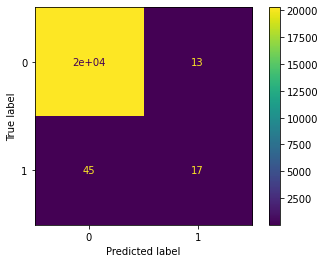

In [377]:
import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


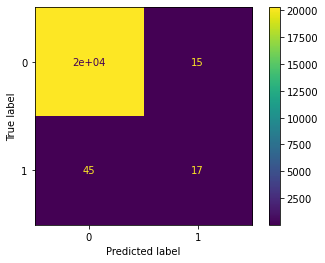

In [443]:
import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(xgb_clf, X_test, y_test)  
plt.show()

In [434]:
X_test.head()

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
30297,2,5,19,9,0,0,0,226,68,52,13,48,77,0.239,6.21,1.0,3,0.0,1,336.0,3,53,4.0,0.0,1.0
36345,5,4,64,5,0,0,2,265,59,20,6,38,75,0.193,2.04,7.0,6,6.0,1,358.0,13,23,4.0,4.0,8.0
47413,2,0,19,0,0,0,0,42,13,5,1,14,20,0.236,3.21,1.0,2,0.0,0,69.0,1,8,0.0,0.0,1.0
48268,0,0,1,1,0,0,0,9,1,1,1,6,3,0.111,3.00,0.0,0,0.0,0,15.0,0,1,0.0,0.0,0.0
21073,22,11,39,38,13,2,1,834,243,93,21,99,189,0.236,3.01,4.0,4,5.0,2,1153.0,1,103,15.0,6.0,26.0


In [435]:
# X_test.drop(['pred', 'actual', 'playerID', 'yearID'], axis=1, inplace=True)

In [436]:
import shap

In [437]:
explainer = shap.Explainer(xgb_clf.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 20353it [15:16, 21.98it/s]                                                                                                                                                                                                             


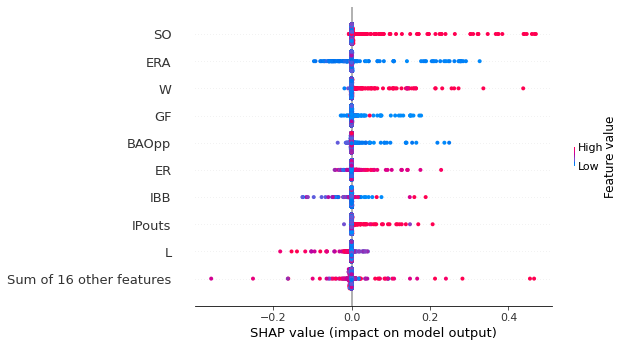

In [438]:
shap.plots.beeswarm(shap_values)

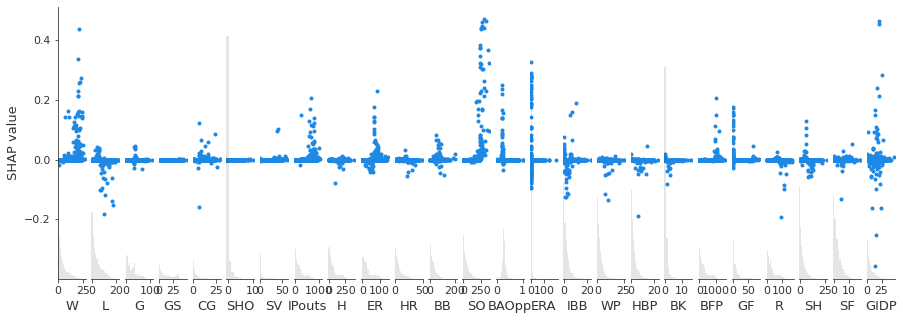

In [440]:
shap.plots.scatter(shap_values, color=shap_values)

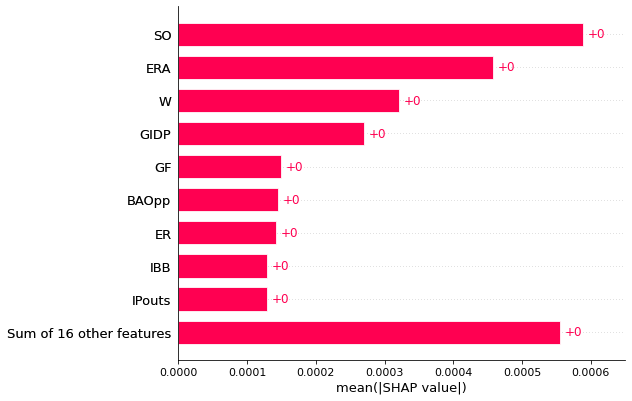

In [439]:
shap.plots.bar(shap_values)

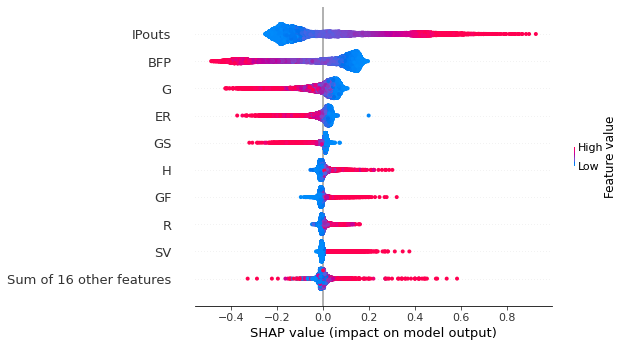

In [300]:
shap.plots.beeswarm(shap_values)

In [191]:
explainer = shap.Explainer(clf.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 20353it [1:13:32,  4.60it/s]                                                                                                                                                                                                           


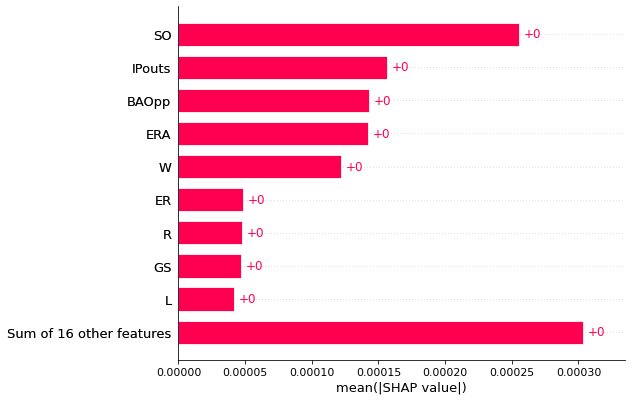

In [267]:
shap.plots.bar(shap_values)

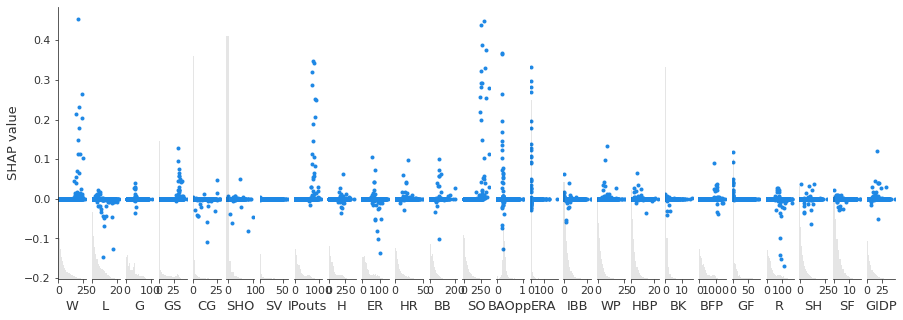

In [271]:
shap.plots.scatter(shap_values, color=shap_values)

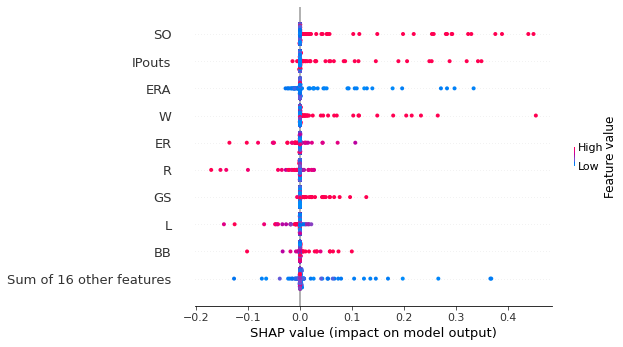

In [192]:
shap.plots.beeswarm(shap_values)

In [9]:
# Initialize dictionaries for player stats and years played
player_stats = {}
years_played = {}

In [ ]:
# for i, row in hof_pitchers.iterrows():
for i, row in pitching_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['W'] = player_stats[playerID]['W'] + row['W']
        player_stats[playerID]['L'] = player_stats[playerID]['L'] + row['L']
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['GS'] = player_stats[playerID]['GS'] + row['GS']
        player_stats[playerID]['CG'] = player_stats[playerID]['CG'] + row['CG']
        player_stats[playerID]['SV'] = player_stats[playerID]['SV'] + row['SV']
        player_stats[playerID]['IPouts'] = player_stats[playerID]['IPouts'] + row['IPouts']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['ER'] = player_stats[playerID]['ER'] + row['ER']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['BAOpp'] = player_stats[playerID]['BAOpp'] + row['BAOpp']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['WP'] = player_stats[playerID]['WP'] + row['WP']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['BK'] = player_stats[playerID]['BK'] + row['BK']
        player_stats[playerID]['BFP'] = player_stats[playerID]['BFP'] + row['BFP']
        player_stats[playerID]['GF'] = player_stats[playerID]['GF'] + row['GF']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        player_stats[playerID]['GIDP'] = player_stats[playerID]['GIDP'] + row['GIDP']
        years_played[playerID].append(row['yearID'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['W'] = row['W']
        player_stats[playerID]['L'] = row['L']
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['GS'] = row['GS']
        player_stats[playerID]['CG'] = row['CG']
        player_stats[playerID]['SV'] = row['SV']
        player_stats[playerID]['IPouts'] = row['IPouts']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['ER'] = row['ER']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['BAOpp'] = row['BAOpp']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['WP'] = row['WP']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['BK'] = row['BK']
        player_stats[playerID]['BFP'] = row['BFP']
        player_stats[playerID]['GF'] = row['GF']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        player_stats[playerID]['GIDP'] = row['GIDP']
        player_stats[playerID]['num_of_20_wins'] = 0
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])
    if row['W'] >= 20:
            player_stats[playerID]['num_of_20_wins'] += 1